<a href="https://colab.research.google.com/github/leandrodakel/PYTHON/blob/main/machine_leaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

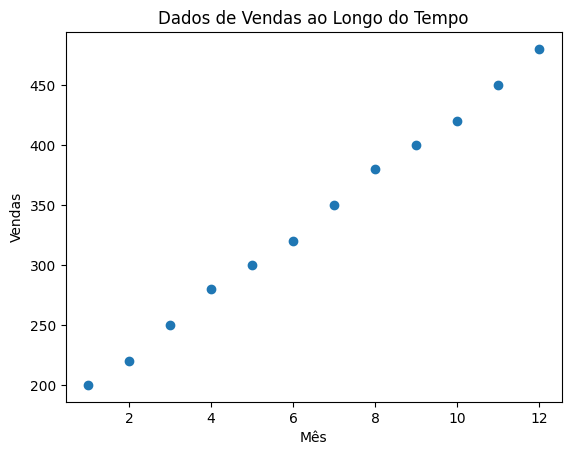

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


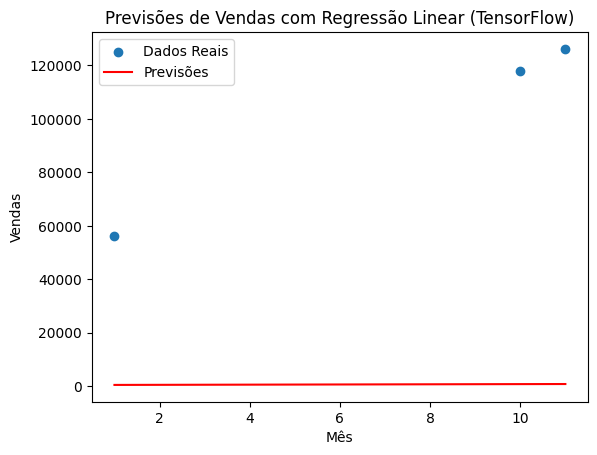

Erro Médio Quadrático (MSE): 10842545152.00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Previsão de Vendas para o Próximo Mês: 866.67


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [2]:
# Imagine que você seja o gerente de uma pequena loja que vende produtos exclusivos. Ao analisar o histórico de vendas ao longo de um ano, você percebeu que as vendas variam à medida que os meses se passam. Para tomar decisões mais informadas sobre o estoque e as estratégias de marketing, você opta por explorar a possibilidade de prever as vendas futuras.


import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf

from sklearn.metrics import mean_squared_error



# Crie dados fictícios de vendas ao longo do tempo

np.random.seed(42)

meses = np.arange(1, 13)

vendas = np.array([200, 220, 250, 280, 300, 320, 350, 380, 400, 420, 450, 480])



# Crie um DataFrame

dados = pd.DataFrame({'Mes': meses, 'Vendas': vendas})



# Visualize os dados

plt.scatter(dados['Mes'], dados['Vendas'])

plt.xlabel('Mês')

plt.ylabel('Vendas')

plt.title('Dados de Vendas ao Longo do Tempo')

plt.show()



# Divida os dados em conjunto de treinamento e teste

X = dados[['Mes']]

y = dados['Vendas']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Normalização dos dados de treinamento

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)



# Crie e treine o modelo de regressão linear usando TensorFlow

model = tf.keras.Sequential([

    tf.keras.layers.Input(shape=(1,)),  # Camada de entrada

    tf.keras.layers.Dense(units=8, activation='relu'),  # Camada escondida com ativação ReLU

    tf.keras.layers.Dense(units=1)  # Camada de saída

])



model.compile(optimizer='adam', loss='mean_squared_error')



# Treine o modelo por mais épocas

model.fit(X_train_scaled, y_train, epochs=500, verbose=0)



# Faça previsões no conjunto de teste

predictions = model.predict(X_test_scaled)



# Desfaça a normalização para avaliar o desempenho

min_sales = dados['Vendas'].min()

max_sales = dados['Vendas'].max()



predictions_inverse = predictions * (max_sales - min_sales) + min_sales

y_test_inverse = y_test * (max_sales - min_sales) + min_sales



# Visualize as previsões em relação aos dados reais

plt.scatter(X_test, y_test_inverse, label='Dados Reais')

plt.plot(X_test, predictions_inverse, color='red', label='Previsões')

plt.xlabel('Mês')

plt.ylabel('Vendas')

plt.title('Previsões de Vendas com Regressão Linear (TensorFlow)')

plt.legend()

plt.show()



# Avalie o desempenho do modelo

erro_mse = mean_squared_error(y_test_inverse, predictions_inverse)

print(f'Erro Médio Quadrático (MSE): {erro_mse:.2f}')



# Faça uma previsão para o próximo mês

proximo_mes_scaled = scaler.transform(np.array([[13]]))

previsao_proximo_mes_scaled = model.predict(proximo_mes_scaled)

previsao_proximo_mes = previsao_proximo_mes_scaled[0, 0] * (max_sales - min_sales) + min_sales

print(f'Previsão de Vendas para o Próximo Mês: {previsao_proximo_mes:.2f}')